Jour 81 : Comprendre le Projet et Installer les Outils

Jour 82 : Chargement et Exploration Initiale

Jour 83 : Analyse des Statistiques Descriptives

Jour 84 : Gestion des Valeurs Manquantes

Jour 85 : Détection et Traitement des Valeurs Aberrantes

Jour 86 : Transformation des 

Jour 87 : Synthèse et Rapport Préliminaire

Jour 88 : Analyse Univariée des Variables

Jour 89 : Analyse Bivariée - Corrélation entre les Variables

Jour 90 : Analyse Graphique des Relations Clés

Jour 91 : Analyse Multivariée - PCA (Réduction de Dimensionnalité)

Jour 92 : Détection de Patterns avec Clustering

Jour 93 : Validation des Hypothèses et Insights

Jour 94 : Rédaction d’un Rapport d’Analyse

Jour 95 : Sélection des Modèles

Jour 96 : Entraînement des Modèles

Jour 97 : Évaluation des Modèles

Jour 98 : Optimisation et Ajustements

Jour 99 : Création d’un Tableau de Bord

Jour 100 : Finalisation et Déploiement


## Jour 81 : Comprendre le Projet et Installer les Outils




### Ce dataset comprend huit variables uniques :

Amount_of_chicken : Nombre de poules dans l’exploitation ou l’enclos.

Amount_of_Feeding : Quantité de nourriture donnée aux poules, probablement en kilogrammes ou en livres.

Ammonia : Niveau d’ammoniac dans le poulailler ou l’enclos. L’ammoniac est un gaz produit par la décomposition des déchets de poules et peut être nocif en concentration élevée.

Temperature : Température à l’intérieur du poulailler ou de l’enclos, probablement mesurée en degrés Celsius.

Humidity : Taux d’humidité dans le poulailler ou l’enclos, exprimé en pourcentage.

Light_Intensity : Intensité lumineuse dans le poulailler ou l’enclos.

Noise : Niveau sonore dans le poulailler ou l’enclos, probablement mesuré en décibels.

Total_egg_production : Nombre total d’œufs produits par les poules.


### les objectifs de l’analyse :

Quels sont les facteurs influençant la production d’œufs ?

Peut-on prédire la production d’œufs en fonction des conditions environnementales ?

##  Jour 82 : Chargement et Exploration Initiale


In [130]:
# Importation des bibliothèques nécessaires
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt


In [131]:
# Importation des bibliothèques nécessaires
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt

# Charger le dataset (remplace 'chemin_du_fichier.csv' par le vrai chemin de ton fichier)
df = pd.read_csv("Egg_Production.csv")

# Afficher les premières lignes du dataset
print("Aperçu du dataset :")
print(df.head())  


Aperçu du dataset :
   Amount_of_chicken  Amount_of_Feeding  Ammonia  Temperature  Humidity  \
0               2728                170     14.4         29.3      51.7   
1               2728                175     17.6         29.3      52.3   
2               2728                175     15.0         29.3      52.5   
3               2728                170     15.0         29.3      49.7   
4               2728                170     15.9         29.2      51.4   

   Light_Intensity  Noise  Total_egg_production  
0              364    214                  2115  
1              369    235                  1958  
2              373    237                  1990  
3              372    240                  2015  
4              381    237                  2112  


In [132]:

# Vérifier les types de données et informations générales
print("\nInformations sur les données :")
print(df.info())  



Informations sur les données :


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Amount_of_chicken     481 non-null    int64  
 1   Amount_of_Feeding     481 non-null    int64  
 2   Ammonia               481 non-null    float64
 3   Temperature           481 non-null    float64
 4   Humidity              481 non-null    float64
 5   Light_Intensity       481 non-null    int64  
 6   Noise                 481 non-null    int64  
 7   Total_egg_production  481 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 30.2 KB
None


In [133]:

# Vérifier les valeurs manquantes
print("\n Vérification des valeurs manquantes :")
print(df.isnull().sum())  



 Vérification des valeurs manquantes :
Amount_of_chicken       0
Amount_of_Feeding       0
Ammonia                 0
Temperature             0
Humidity                0
Light_Intensity         0
Noise                   0
Total_egg_production    0
dtype: int64


Jour 83 : Analyse des Statistiques Descriptives


In [134]:
# 1. Calculer des statistiques descriptives
print("Statistiques descriptives :")
print(df.describe())


Statistiques descriptives :
       Amount_of_chicken  Amount_of_Feeding     Ammonia  Temperature  \
count         481.000000         481.000000  481.000000    481.00000   
mean         2710.230769         182.370062   14.992931     29.69210   
std            39.105130           7.745715    1.087367      0.81536   
min          2639.000000         170.000000   13.100000     28.50000   
25%          2673.000000         175.000000   14.200000     29.10000   
50%          2728.000000         180.000000   14.900000     29.30000   
75%          2736.000000         190.000000   15.800000     30.00000   
max          2745.000000         200.000000   17.900000     32.00000   

         Humidity  Light_Intensity       Noise  Total_egg_production  
count  481.000000       481.000000  481.000000            481.000000  
mean    50.724116       332.754678  203.045738           1936.199584  
std      1.673308        26.071818   31.669616            189.111513  
min     46.100000       239.000000   81

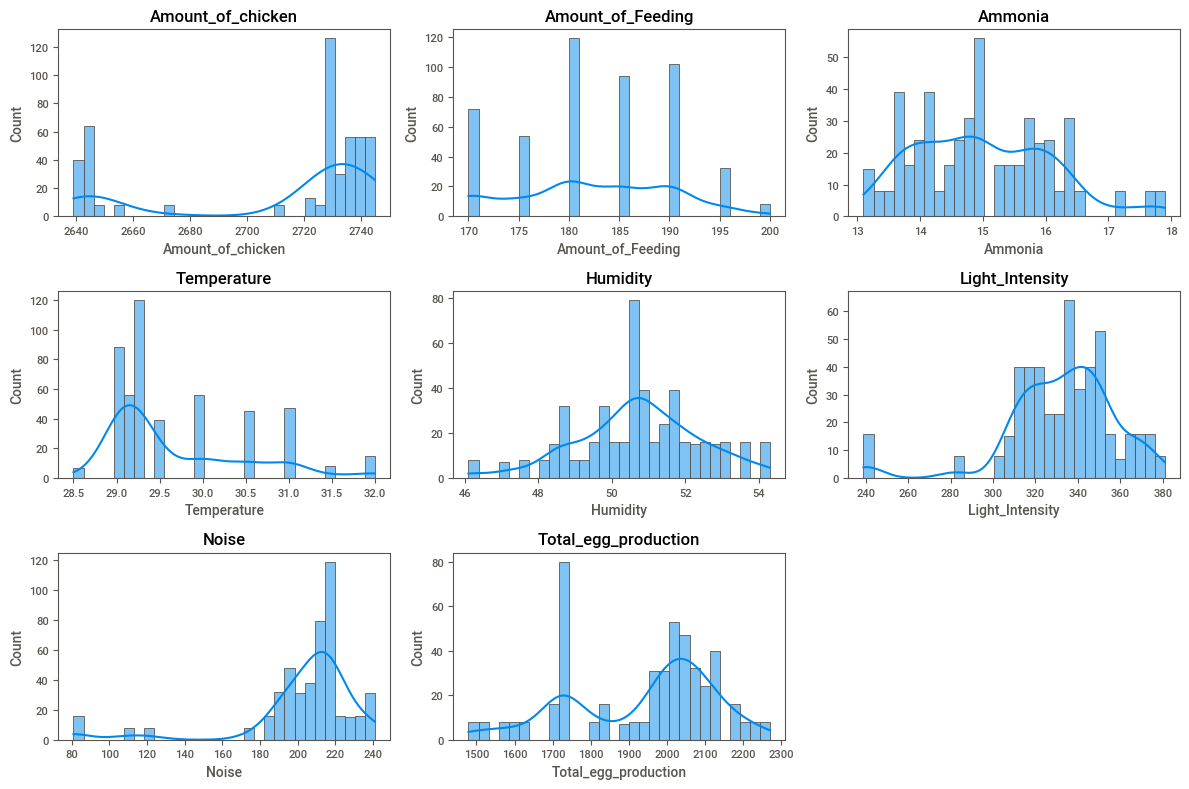

In [135]:
# 2. Visualiser la distribution des variables avec des histogrammes
num_columns = df.select_dtypes(include=['number']).columns  # Sélectionner uniquement les colonnes numériques

plt.figure(figsize=(12, 8))
for i, col in enumerate(num_columns, 1):
    plt.subplot(3, 3, i)  # Adapter en fonction du nombre de colonnes
    sns.histplot(df[col], bins=30, kde=True)  # Histogramme avec courbe KDE
    plt.title(col)

plt.tight_layout()
plt.show()


In [136]:
# 3. Vérifier les valeurs minimales et maximales pour identifier d'éventuelles valeurs aberrantes
print("\n Valeurs minimales et maximales :")
for col in num_columns:
    print(f"{col} > Min: {df[col].min()}, Max: {df[col].max()}")



 Valeurs minimales et maximales :
Amount_of_chicken > Min: 2639, Max: 2745
Amount_of_Feeding > Min: 170, Max: 200
Ammonia > Min: 13.1, Max: 17.9
Temperature > Min: 28.5, Max: 32.0
Humidity > Min: 46.1, Max: 54.3
Light_Intensity > Min: 239, Max: 381
Noise > Min: 81, Max: 241
Total_egg_production > Min: 1479, Max: 2271


### Jour 84 : Gestion des Valeurs Manquantes
 

In [137]:
# 1. Vérifier les valeurs manquantes
print(" Valeurs manquantes avant le traitement :")
print(df.isnull().sum())

# 2. Traiter les valeurs manquantes
# Option 1 : Supprimer les lignes avec des valeurs manquantes
df_cleaned = df.dropna()

# Option 2 : Imputation (remplacement des valeurs manquantes)
# Ici, on remplace par la moyenne pour les colonnes numériques
df_filled = df.fillna(df.mean())

# 3. Vérifier que les valeurs manquantes ont été traitées
print("\n Vérification après suppression des valeurs manquantes :")
print(df_cleaned.isnull().sum())  # Pour df_cleaned

print("\n Vérification après imputation des valeurs manquantes :")
print(df_filled.isnull().sum())  # Pour df_filled


 Valeurs manquantes avant le traitement :
Amount_of_chicken       0
Amount_of_Feeding       0
Ammonia                 0
Temperature             0
Humidity                0
Light_Intensity         0
Noise                   0
Total_egg_production    0
dtype: int64

 Vérification après suppression des valeurs manquantes :
Amount_of_chicken       0
Amount_of_Feeding       0
Ammonia                 0
Temperature             0
Humidity                0
Light_Intensity         0
Noise                   0
Total_egg_production    0
dtype: int64

 Vérification après imputation des valeurs manquantes :
Amount_of_chicken       0
Amount_of_Feeding       0
Ammonia                 0
Temperature             0
Humidity                0
Light_Intensity         0
Noise                   0
Total_egg_production    0
dtype: int64


### Jour 85 : Détection et Traitement des Valeurs Aberrantes


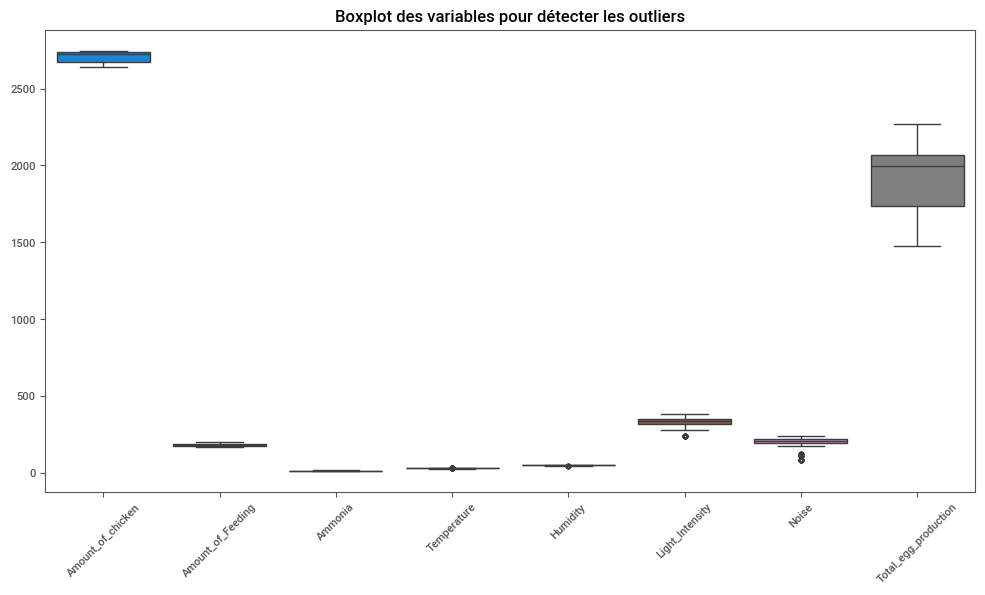

Taille du dataset avant nettoyage : (481, 8)
Taille du dataset après suppression des outliers : (418, 8)


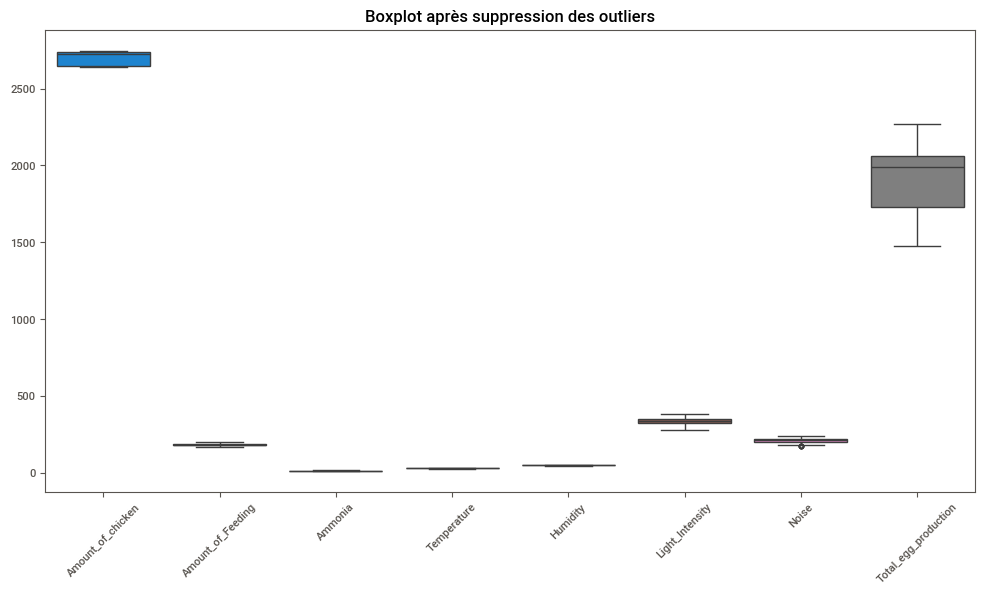

In [138]:
# 1. Visualisation des outliers avec des boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplot des variables pour détecter les outliers")
plt.show()

# 2. Détection et suppression des outliers avec la méthode IQR

# Définition de la fonction pour détecter et supprimer les outliers
def remove_outliers_iqr(dataframe):
    Q1 = dataframe.quantile(0.25)  # Premier quartile (25%) valeur en dessous de laquelle se trouvent 25% des données.
    Q3 = dataframe.quantile(0.75)  # Troisième quartile (75%)  valeur sous laquelle se trouvent 75% des données.
    IQR = Q3 - Q1  # Intervalle interquartile qui correspond à la plage centrale contenant 50% des valeurs.
    lower_bound = Q1 - 1.5 * IQR  # Limite inférieure  Toute valeur inférieure à cette borne est un outlier inférieur.
    upper_bound = Q3 + 1.5 * IQR  # Limite supérieure  Toute valeur supérieure à cette borne est un outlier supérieur.
    df_filtered = dataframe[~((dataframe < lower_bound) | (dataframe > upper_bound)).any(axis=1)]
# (dataframe < lower_bound) | (dataframe > upper_bound) → Identifie les valeurs inférieures à la borne inférieure ou supérieures à la borne supérieure.
# .any(axis=1) → Vérifie si une ligne contient au moins un outlier.
# ~[...] → Garde uniquement les lignes qui ne contiennent pas d'outliers.

    return df_filtered

# Application de la méthode IQR pour supprimer les outliers
df_cleaned = remove_outliers_iqr(df)

# 3. Vérification de l'impact de la suppression
print(f"Taille du dataset avant nettoyage : {df.shape}")
print(f"Taille du dataset après suppression des outliers : {df_cleaned.shape}")

# Affichage des boxplots après suppression des outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned)
plt.xticks(rotation=45)
plt.title("Boxplot après suppression des outliers")
plt.show()


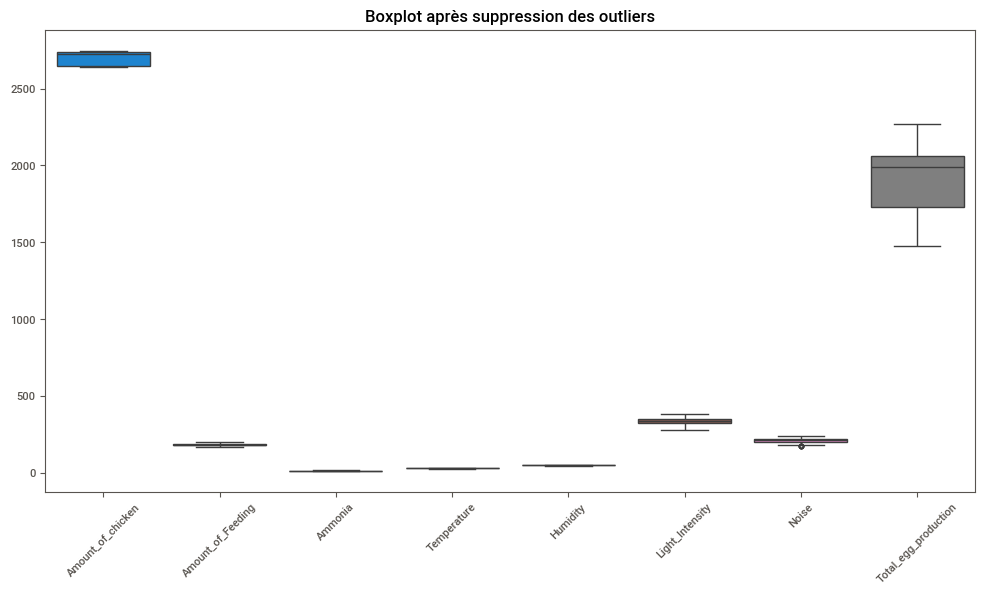

In [139]:

# Affichage des boxplots après suppression des outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned)
plt.xticks(rotation=45)
plt.title("Boxplot après suppression des outliers")
plt.show()


### Jour 86 : Transformation des Variables


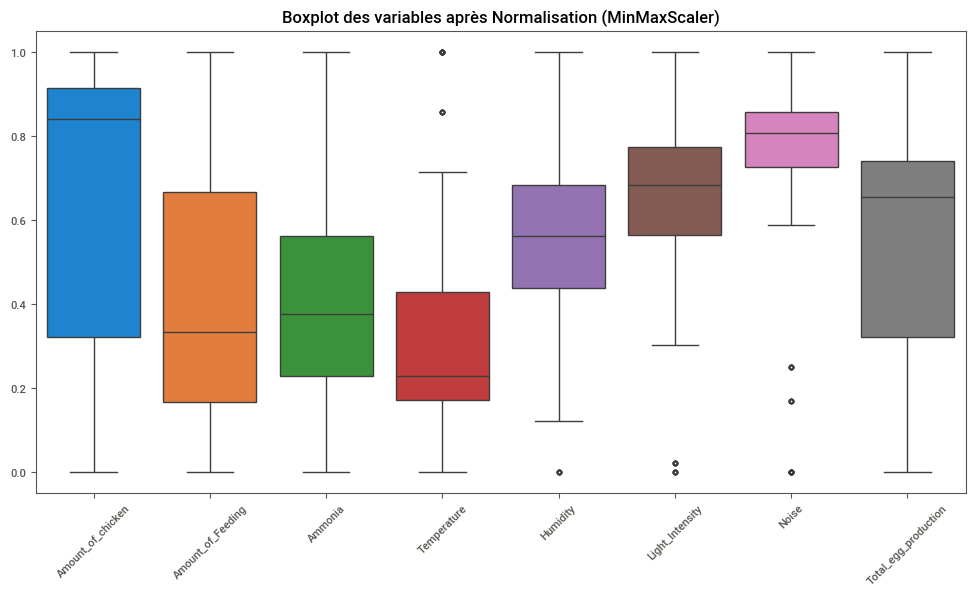

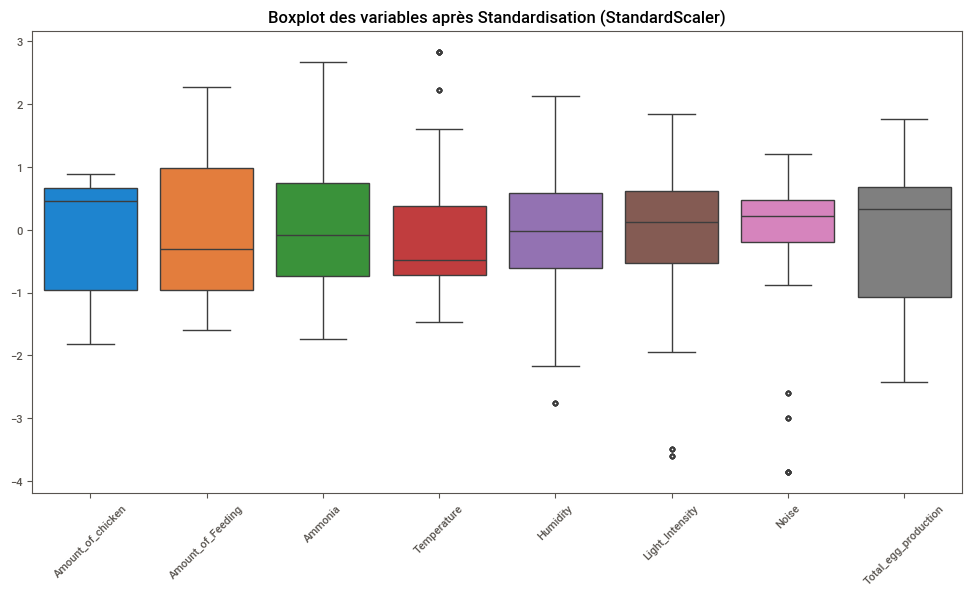

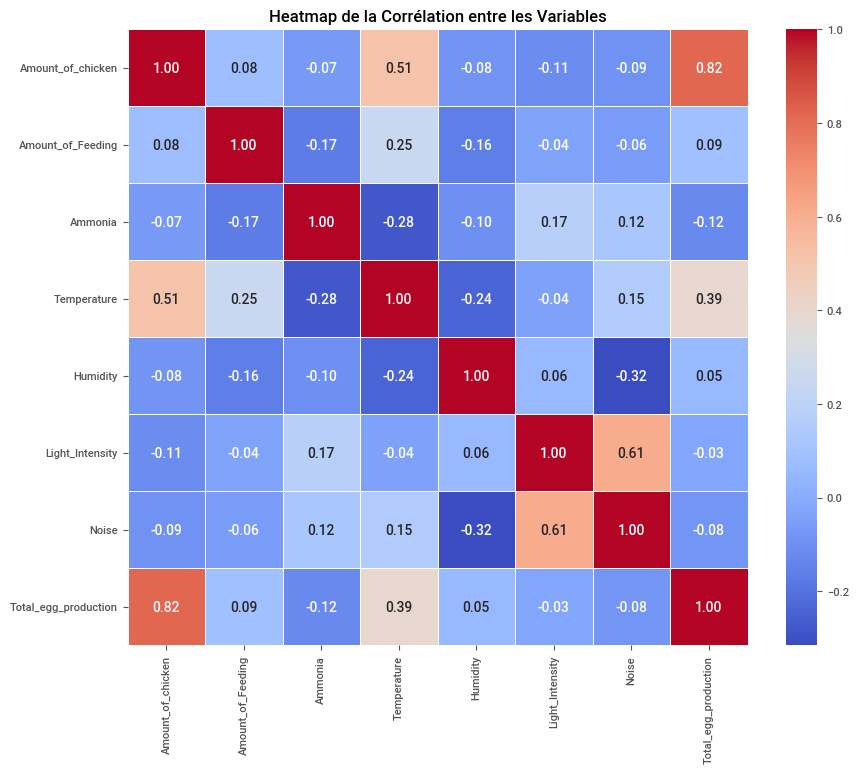

In [140]:
# Importation des bibliothèques nécessaires
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Charger le dataset
df = pd.read_csv("Egg_Production.csv")

# Sélection des colonnes numériques pour transformation
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# 1. Normalisation des données avec MinMaxScaler Transforme les valeurs pour qu'elles soient comprises entre 0 et 1.
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# 2. Standardisation des données avec StandardScaler Transforme les données pour qu'elles aient une moyenne de 0 et un écart-type de 1.
scaler_std = StandardScaler()
df_standardized = df.copy()
df_standardized[numerical_cols] = scaler_std.fit_transform(df[numerical_cols])

# 3. Visualisation des données avant/après normalisation
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_normalized)
plt.xticks(rotation=45)
plt.title("Boxplot des variables après Normalisation (MinMaxScaler)")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_standardized)
plt.xticks(rotation=45)
plt.title("Boxplot des variables après Standardisation (StandardScaler)")
plt.show()

# 4. Calcul et Affichage de la matrice de corrélation
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap de la Corrélation entre les Variables")
plt.show()


Jour 87 : Synthèse et Rapport Préliminaire
Rapport Préliminaire : Analyse des Données de Production d’Œufs

🔹 1. Introduction

Ce rapport présente une analyse préliminaire des données collectées sur la production d'œufs dans différentes conditions environnementales. L'objectif est d'identifier des tendances et d'optimiser les pratiques agricoles.

🔹 2. Résumé des Étapes Réalisées

Jour	Tâche	Résultats Principaux
Jour 2	Exploration des données	Aperçu des premières lignes, types de données et valeurs manquantes
Jour 3	Analyse statistique	Identification des moyennes, médianes et valeurs aberrantes
Jour 4	Gestion des valeurs manquantes	Suppression ou imputation des données absentes
Jour 5	Détection des valeurs aberrantes	Suppression des valeurs extrêmes via IQR et boxplots
Jour 6	Transformation des variables	Normalisation et analyse des corrélations entre variables

🔹 3. Problèmes Identifiés

Présence de valeurs manquantes → Solution : Imputation par la moyenne/médiane.
Valeurs aberrantes détectées dans certaines variables (ex. Ammonia, Light Intensity) → Suppression ou transformation.
Corrélation forte entre certaines variables (ex. Température & Humidité) → Peut affecter les modèles prédictifs.

🔹 4. Insights Clés

 La température et l’humidité semblent influencer directement la production d’œufs.
 Un excès d’ammoniac pourrait être un facteur limitant pour la production.
 Une alimentation insuffisante est corrélée à une baisse de la production d'œufs.



### Jour 88 : Analyse Univariée des Variables
Pour l'analyse univariée des variables, nous allons examiner la distribution de chaque variable indépendamment afin d'identifier les tendances, les formes de distribution (normale, asymétrique, etc.), ainsi que la présence de valeurs extrêmes.

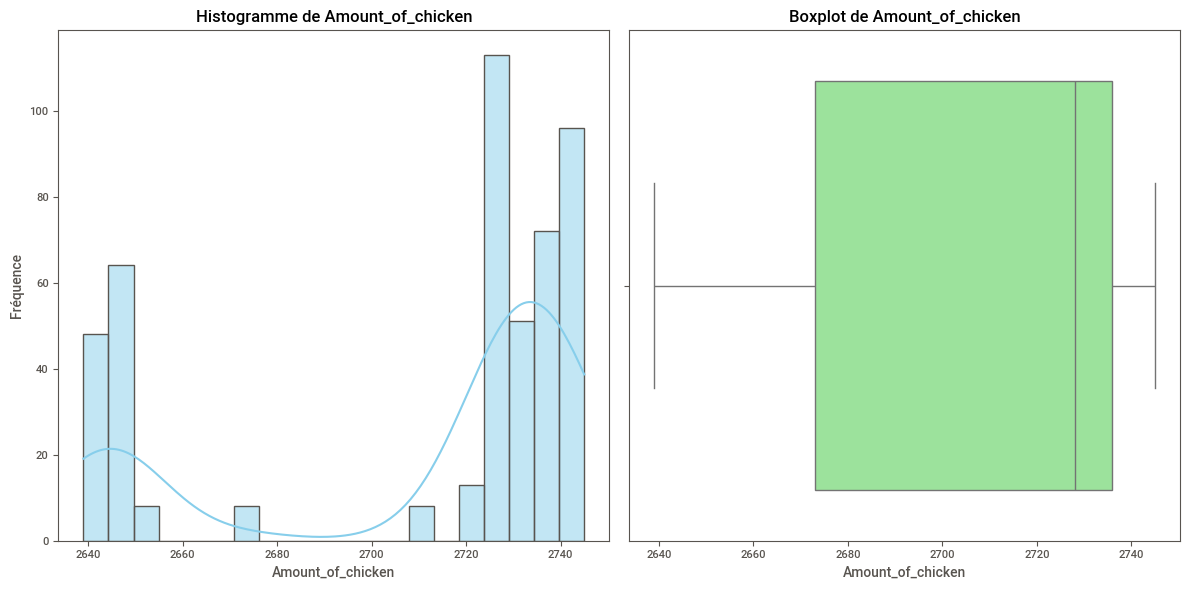

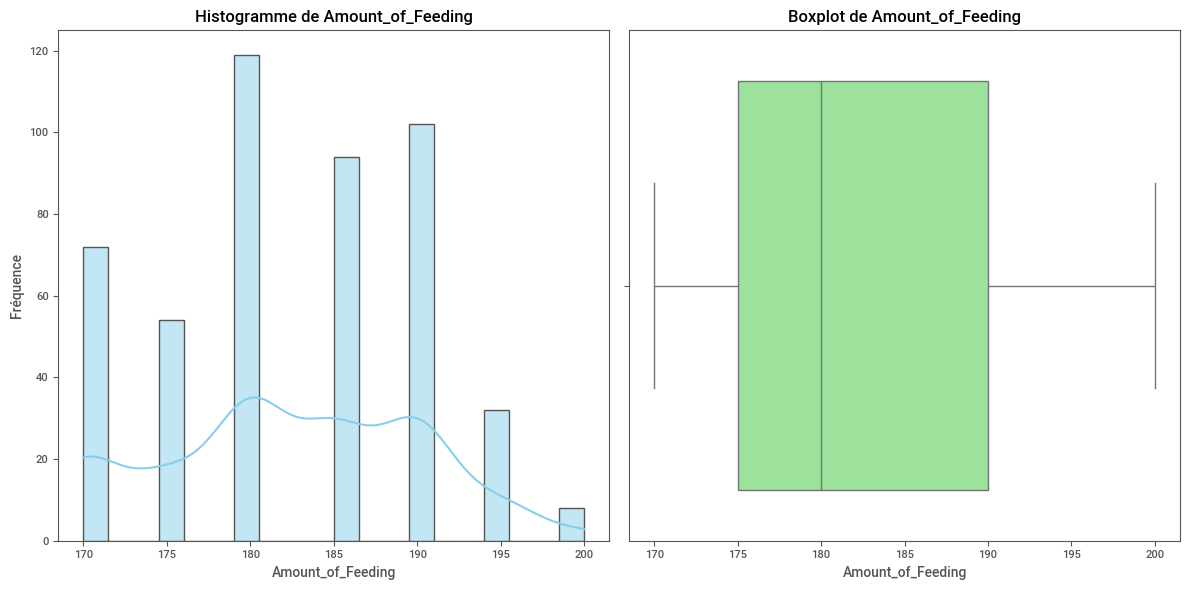

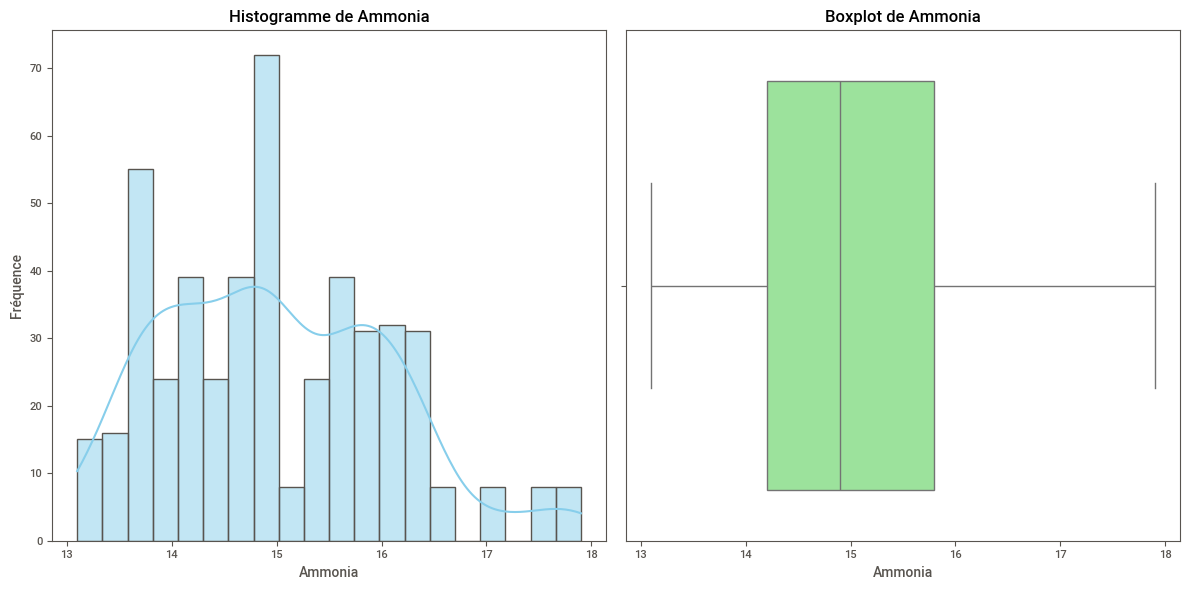

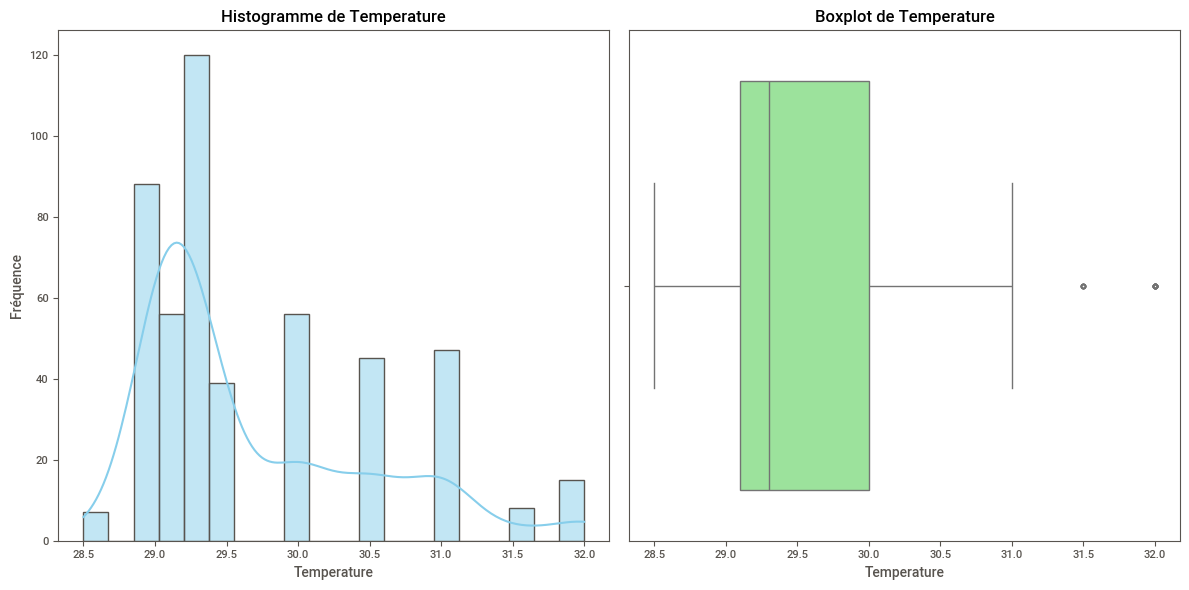

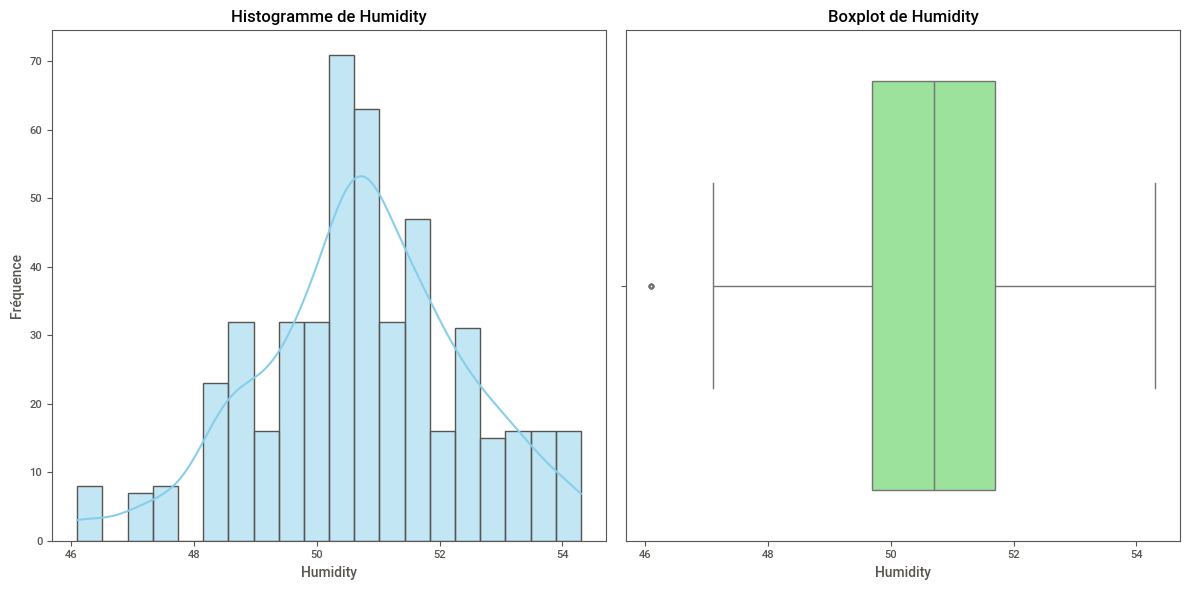

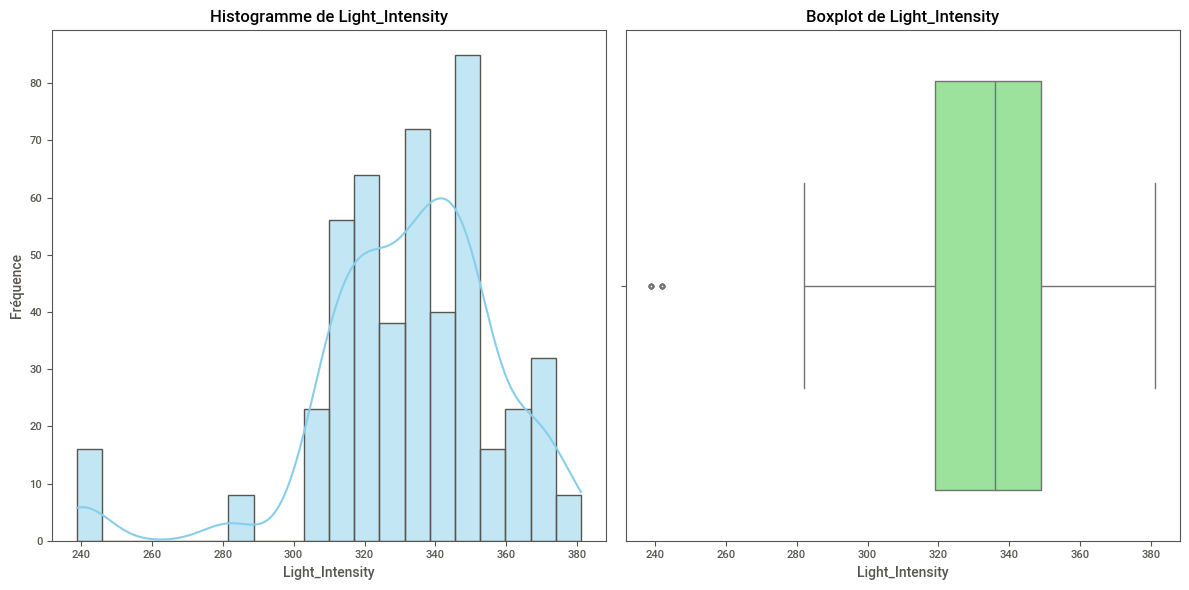

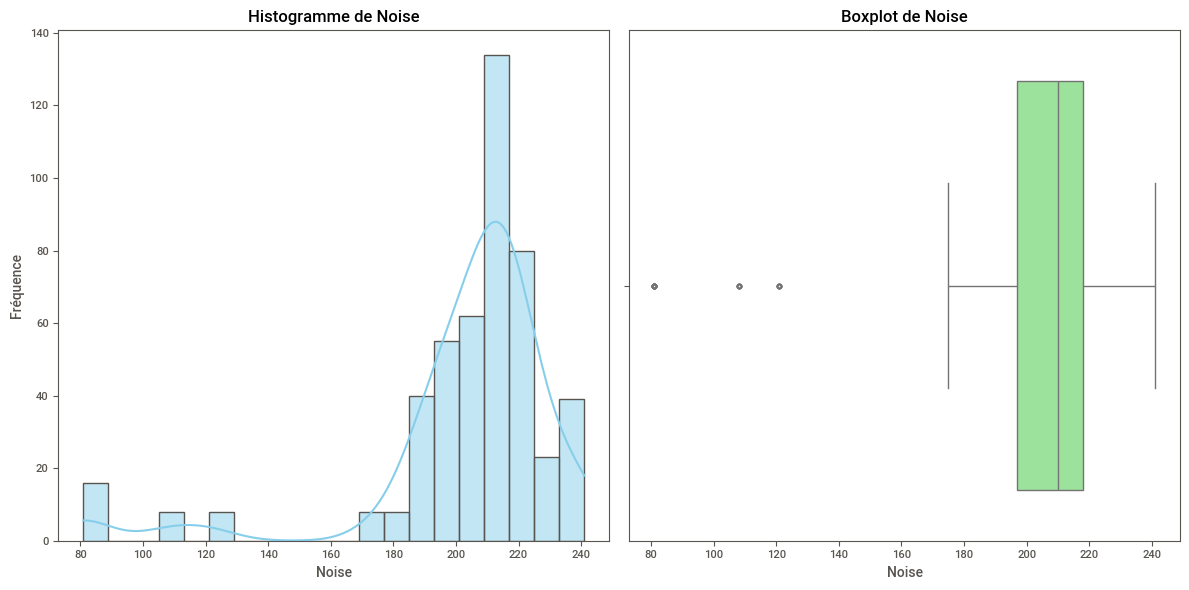

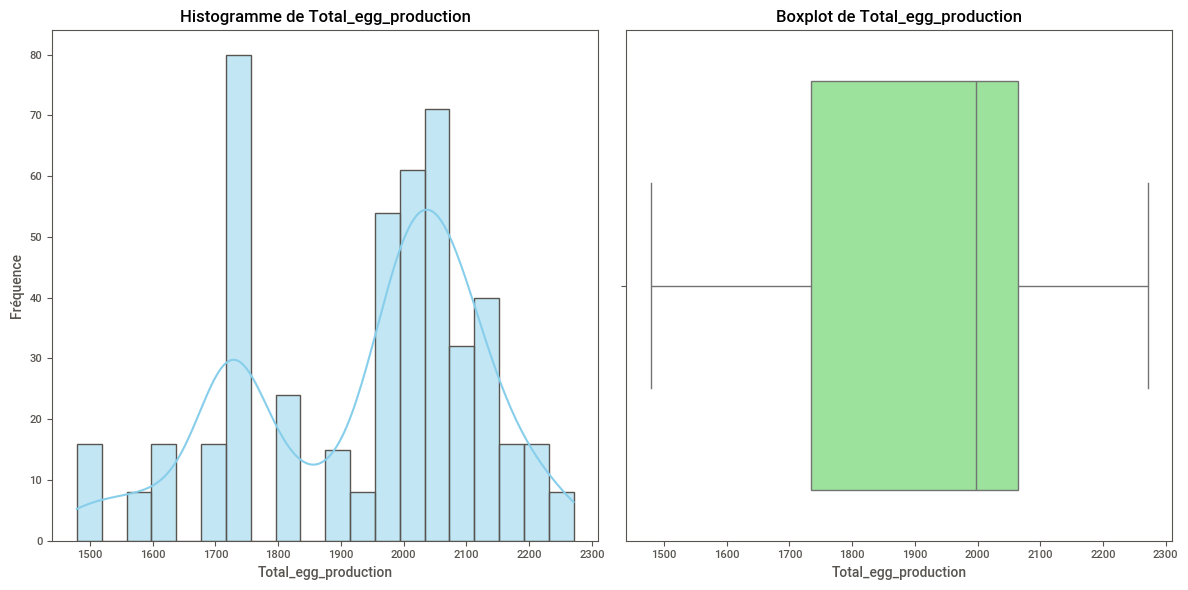

In [141]:
# Importation des bibliothèques nécessaires
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sélectionner les colonnes numériques
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Visualisation univariée de chaque variable
for col in numerical_cols:
    plt.figure(figsize=(12, 6))

    # Histogramme de la variable
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Histogramme de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')

    # Boxplot de la variable
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)

    # Affichage des graphiques
    plt.tight_layout()
    plt.show()



### Jour 89 : Analyse Bivariée - Corrélation entre les Variables


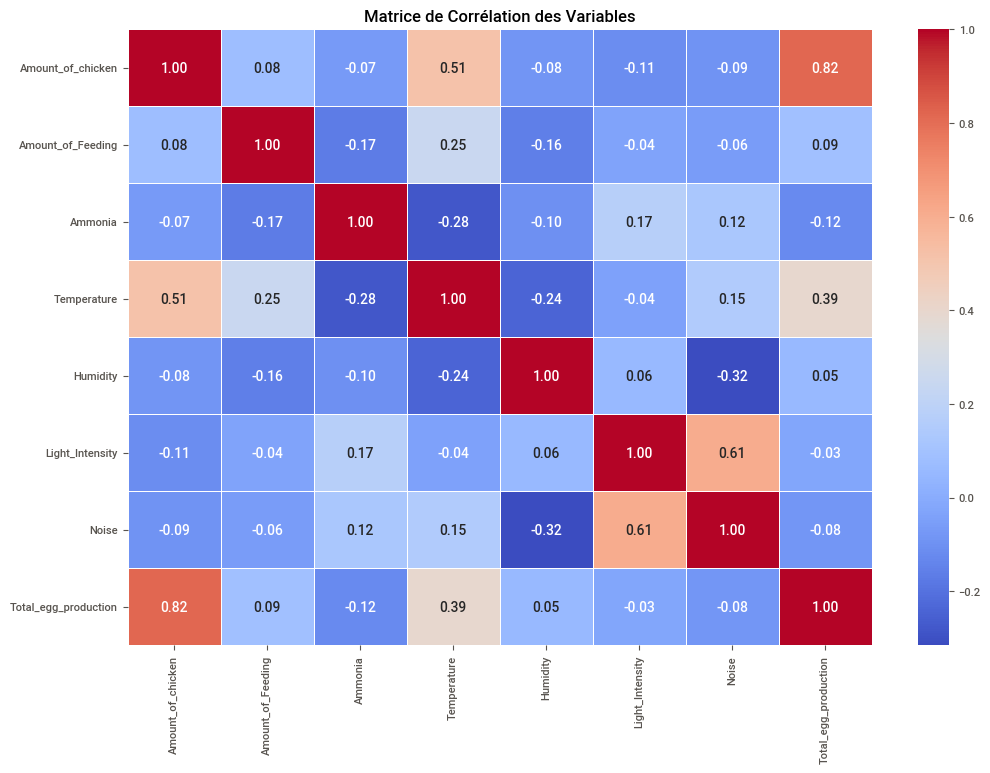

In [142]:
# Importation des bibliothèques nécessaires
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculer la matrice de corrélation
corr_matrix = df.corr()

# Visualiser la matrice de corrélation avec un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation des Variables')
plt.show()


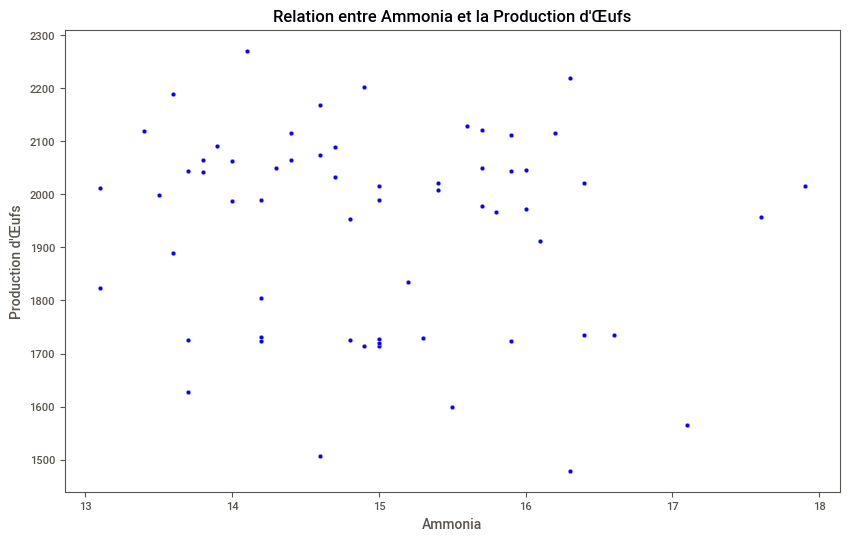

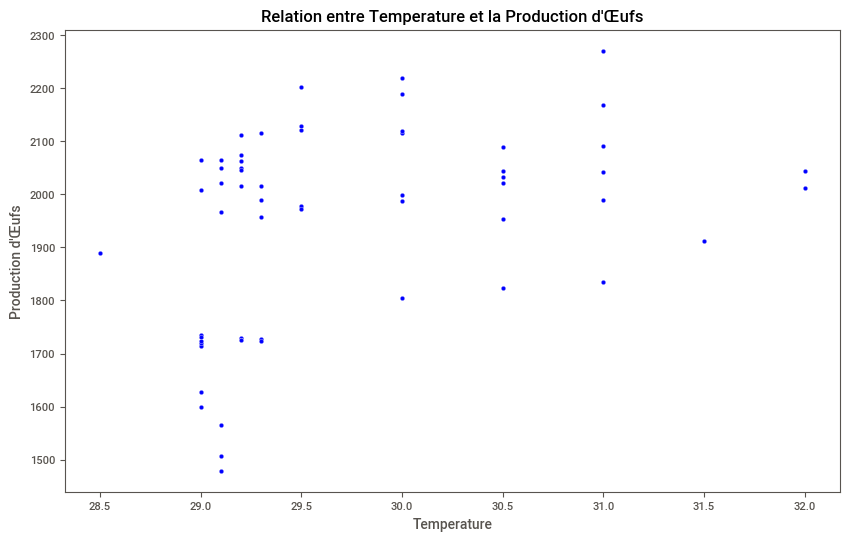

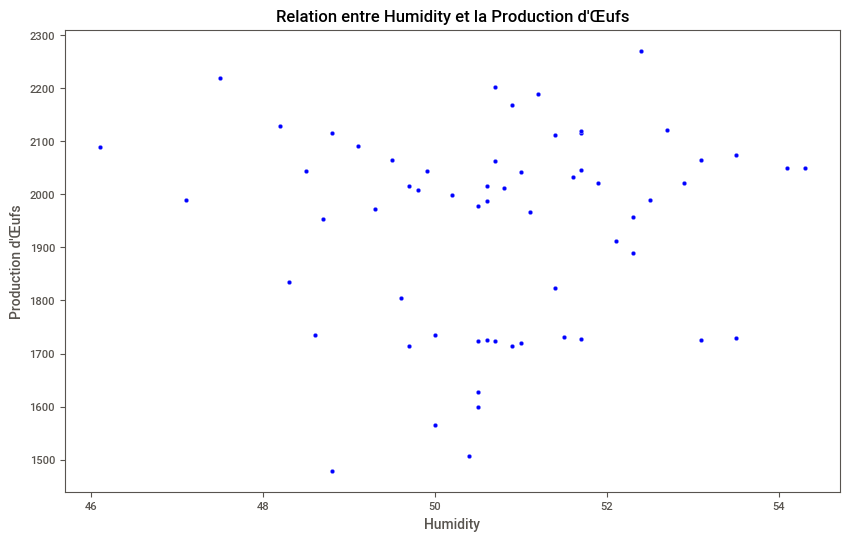

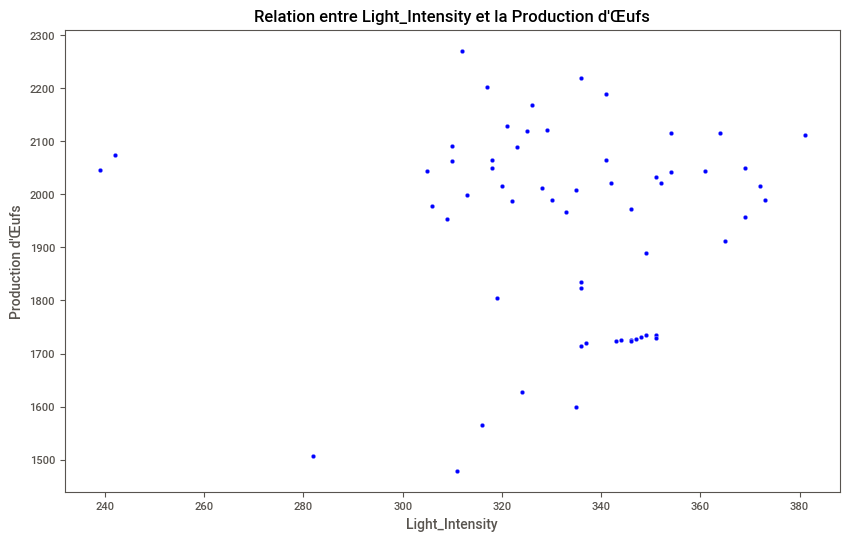

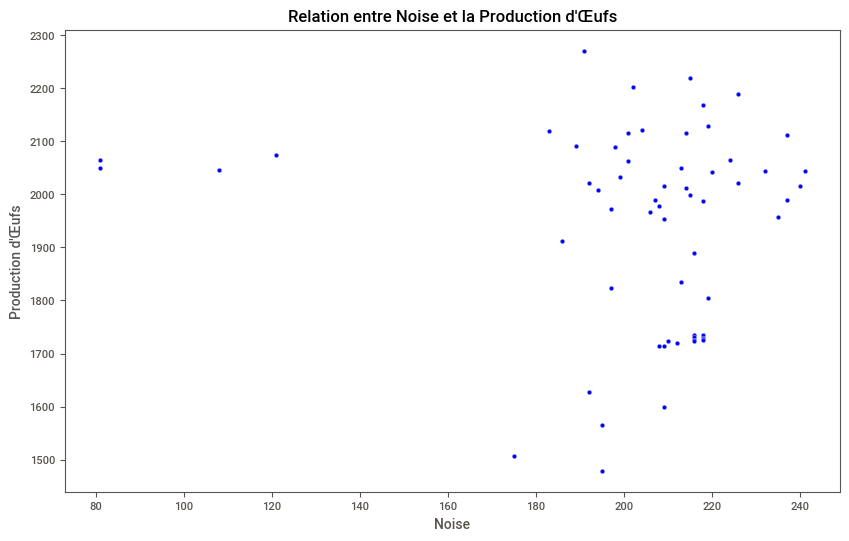

In [143]:
# Visualisation de la relation entre les facteurs environnementaux et la production d’œufs
environmental_factors = ['Ammonia', 'Temperature', 'Humidity', 'Light_Intensity', 'Noise']  # Liste des facteurs environnementaux

# Tracer les graphiques pour chaque facteur environnemental en fonction de la production d'œufs
for factor in environmental_factors:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[factor], y=df['Total_egg_production'], color='blue')
    plt.title(f'Relation entre {factor} et la Production d\'Œufs')
    plt.xlabel(factor)
    plt.ylabel('Production d\'Œufs')
    plt.show()


### Jour 90 : Analyse Graphique des Relations Clés


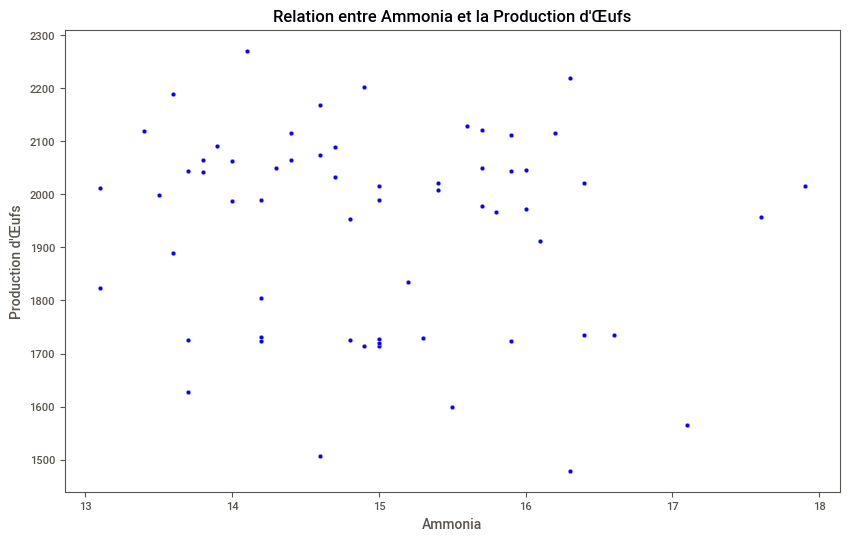

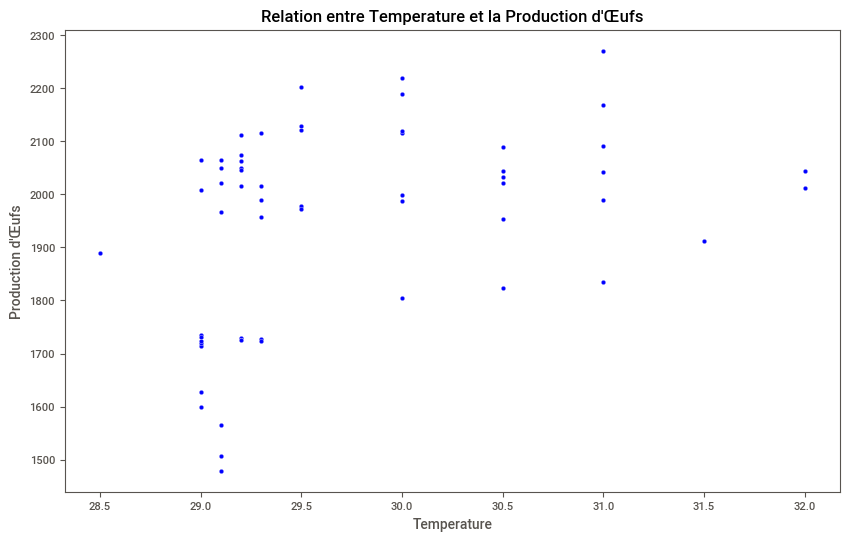

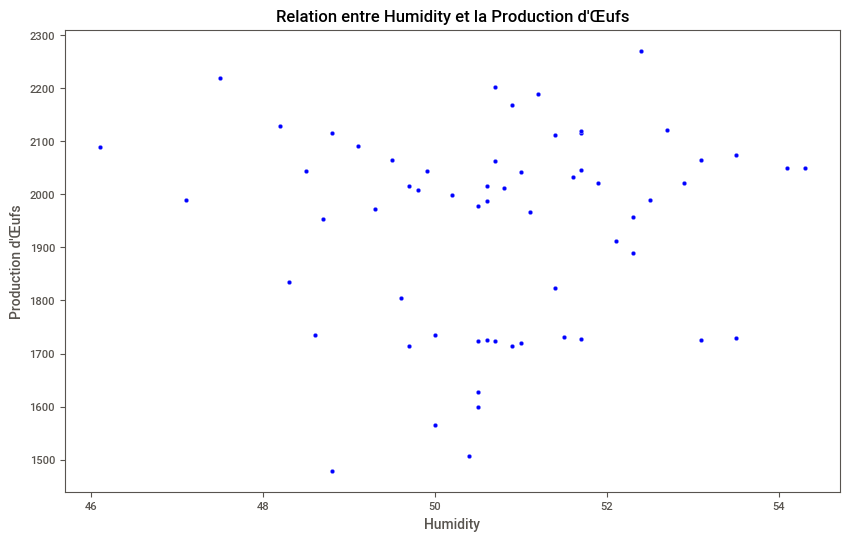

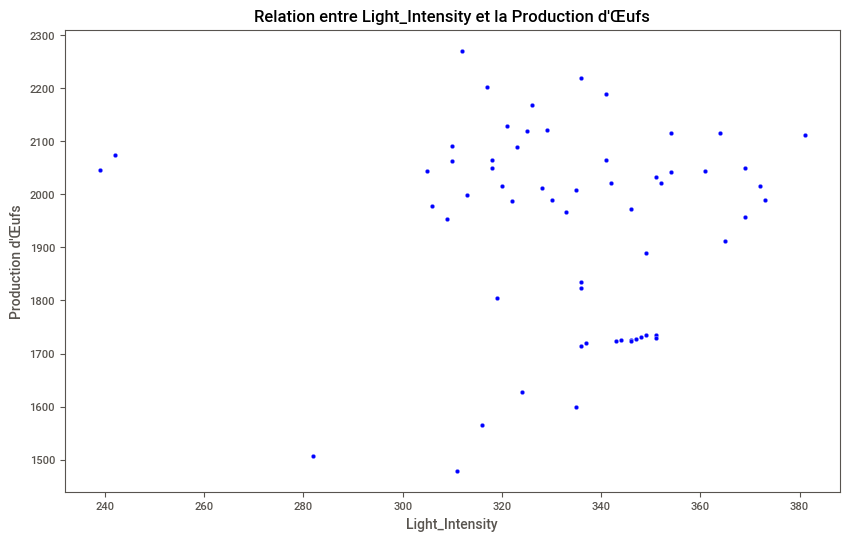

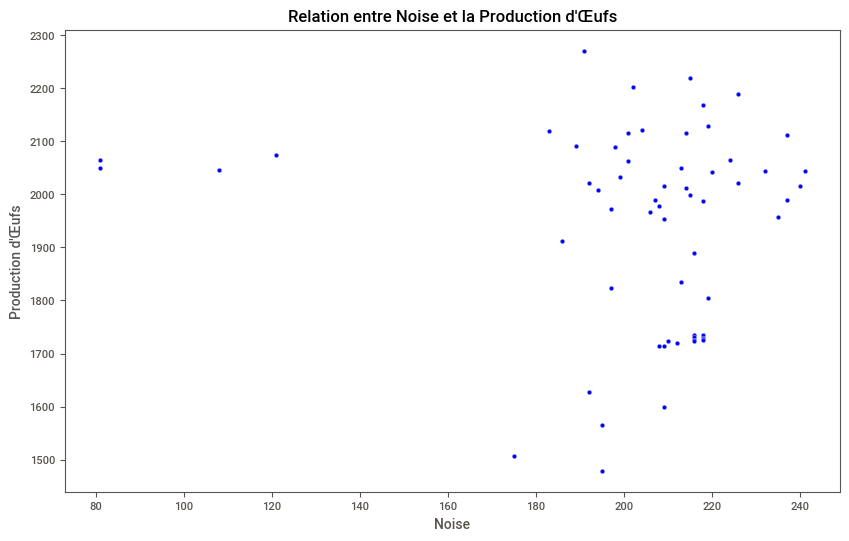

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

# Liste des facteurs environnementaux
environmental_factors = ['Ammonia', 'Temperature', 'Humidity', 'Light_Intensity', 'Noise']

# Tracer des scatter plots pour chaque facteur environnemental contre la production d'œufs
for factor in environmental_factors:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[factor], y=df['Total_egg_production'], color='blue')
    plt.title(f'Relation entre {factor} et la Production d\'Œufs')
    plt.xlabel(factor)
    plt.ylabel('Production d\'Œufs')
    plt.show()


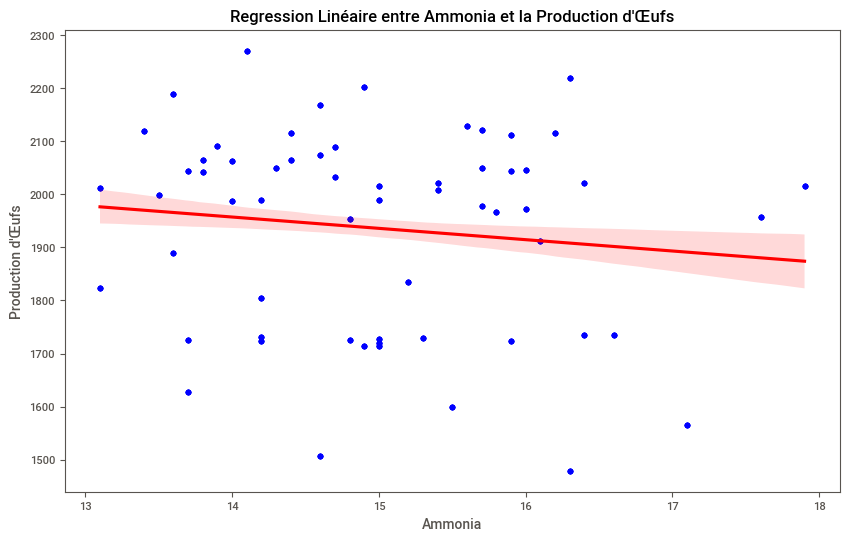

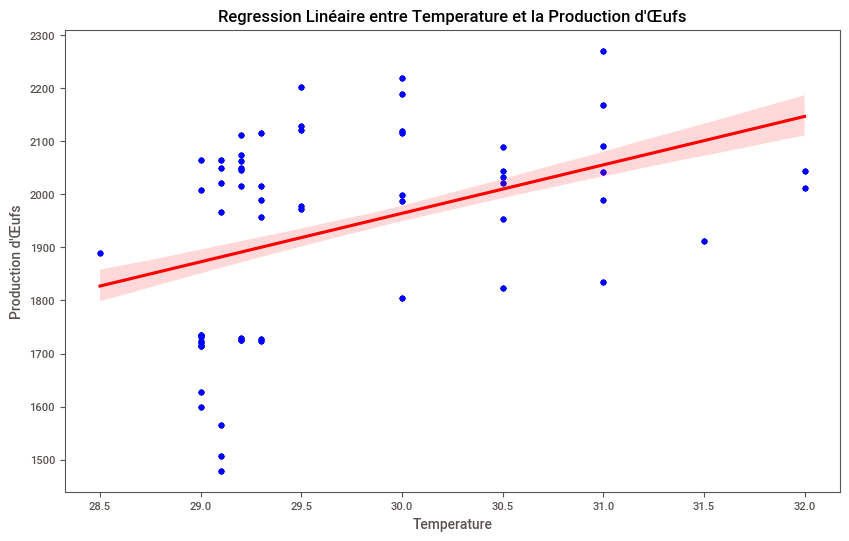

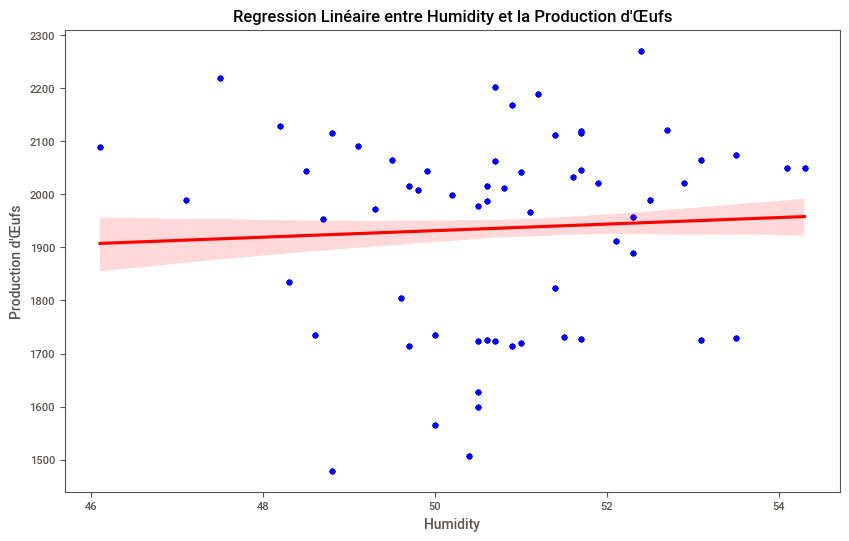

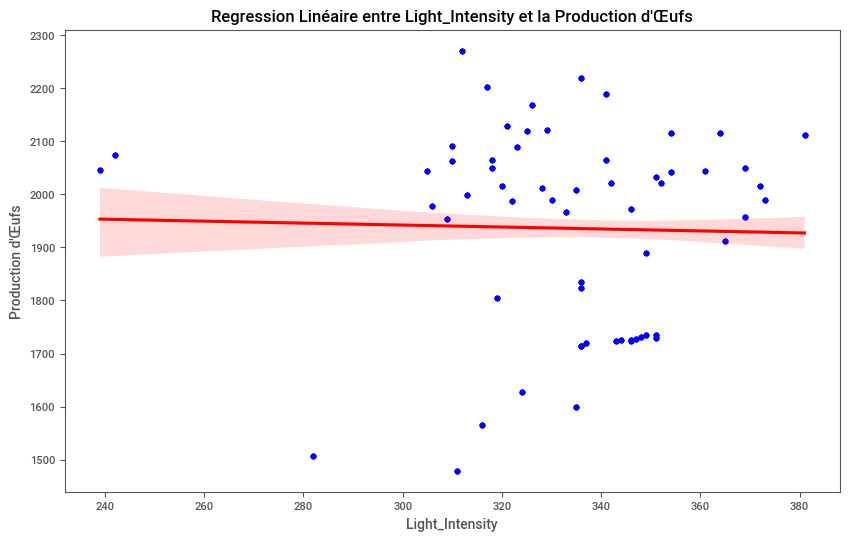

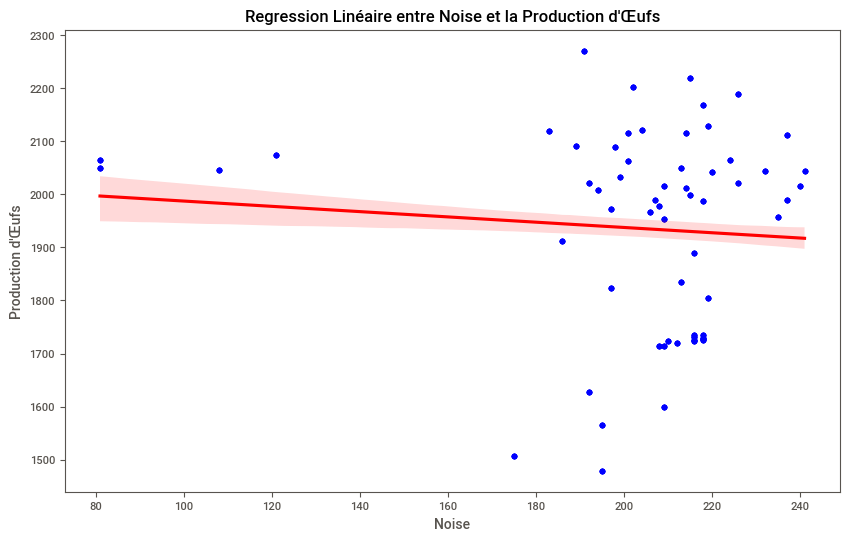

In [145]:
# Tracer des régressions linéaires avec sns.regplot()
for factor in environmental_factors:
    plt.figure(figsize=(10, 6))
    sns.regplot(x=df[factor], y=df['Total_egg_production'], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
    plt.title(f'Regression Linéaire entre {factor} et la Production d\'Œufs')
    plt.xlabel(factor)
    plt.ylabel('Production d\'Œufs')
    plt.show()



### Jour 91 : Analyse Multivariée - PCA (Réduction de Dimensionnalité)


In [146]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


# Sélectionner les variables quantitatives (ici on suppose que toutes les colonnes sauf 'Total_egg_production' sont environnementales)
X = df[['Ammonia', 'Temperature', 'Humidity', 'Light_Intensity', 'Noise']]

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [147]:
# Appliquer la PCA
pca = PCA(n_components=2)  # Nous réduisons à 2 composantes principales pour simplification
X_pca = pca.fit_transform(X_scaled)

# Créer un DataFrame pour les composantes principales
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])


C:\Users\AB SOLUTIONS\AppData\Local\Temp\ipykernel_16744\852935540.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




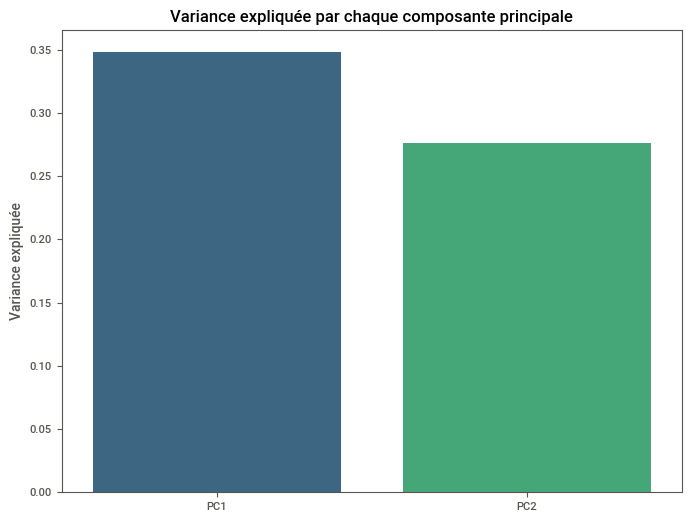

Composantes principales (coefficients):
[[ 0.25414566  0.10945407 -0.31786129  0.59274931  0.68632517]
 [-0.50177965  0.70823483 -0.42595764 -0.24114311  0.08384932]]


In [148]:
# Variance expliquée par chaque composante
explained_variance = pca.explained_variance_ratio_

# Visualiser la variance expliquée
plt.figure(figsize=(8, 6))
sns.barplot(x=['PC1', 'PC2'], y=explained_variance, palette='viridis')
plt.title("Variance expliquée par chaque composante principale")
plt.ylabel("Variance expliquée")
plt.show()

# Afficher les composantes principales
print("Composantes principales (coefficients):")
print(pca.components_)


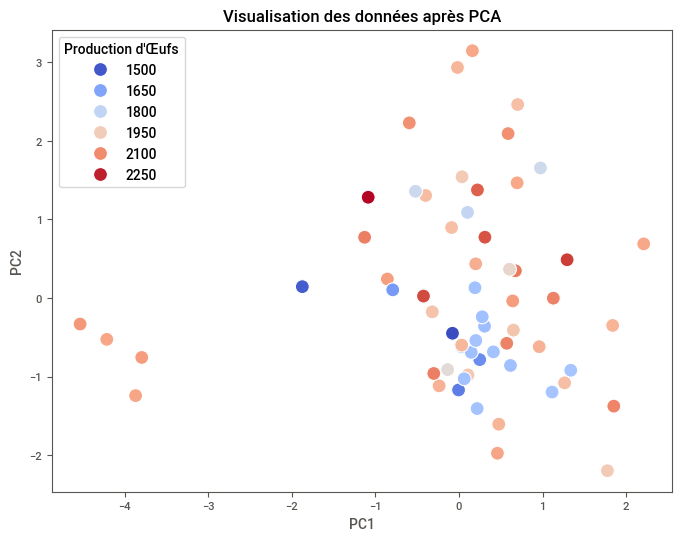

In [149]:
# Visualiser les points dans l'espace des composantes principales
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=df['Total_egg_production'], palette='coolwarm', s=100)
plt.title("Visualisation des données après PCA")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Production d\'Œufs')
plt.show()


### Jour 92 : Détection de Patterns avec Clustering

In [150]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt


# Sélectionner les variables environnementales et la production d'œufs
X = df[['Ammonia', 'Temperature', 'Humidity', 'Light_Intensity', 'Noise', 'Total_egg_production']]

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


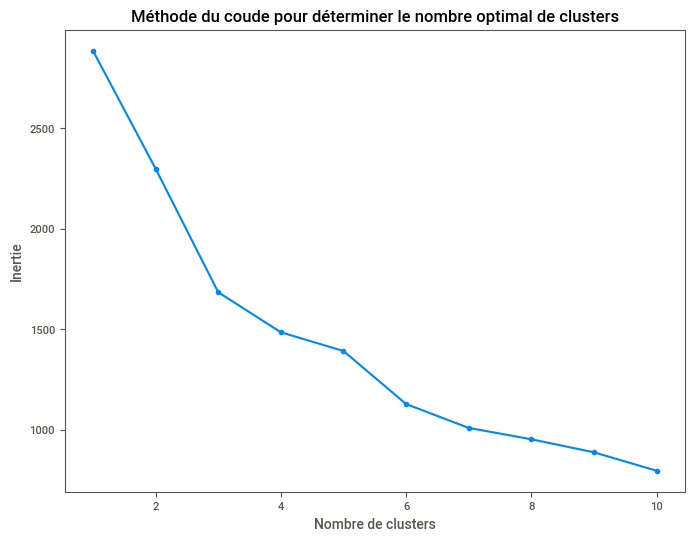

In [151]:
# Calculer l'inertie pour différents nombres de clusters
inertia = []
for k in range(1, 11):  # Tester pour k=1 à k=10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Tracer l'inertie en fonction du nombre de clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Méthode du coude pour déterminer le nombre optimal de clusters")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.show()


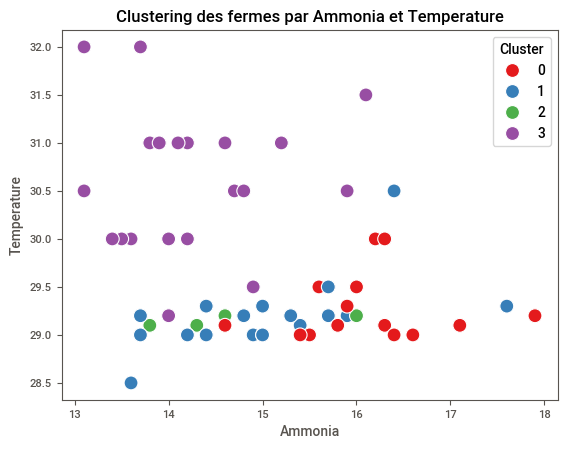

In [152]:
# Appliquer K-Means avec le nombre optimal de clusters
k_optimal = 4  # Supposons que le nombre optimal de clusters est 4 (à ajuster selon la méthode du coude)
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualiser les clusters
sns.scatterplot(x=df['Ammonia'], y=df['Temperature'], hue=df['Cluster'], palette='Set1', s=100)
plt.title("Clustering des fermes par Ammonia et Temperature")
plt.xlabel("Ammonia")
plt.ylabel("Temperature")
plt.show()


In [153]:
# Afficher les caractéristiques moyennes des clusters
cluster_means = df.groupby('Cluster').mean()
print(cluster_means)


         Amount_of_chicken  Amount_of_Feeding    Ammonia  Temperature  \
Cluster                                                                 
0              2696.433071         183.149606  16.021260    29.273228   
1              2690.341772         179.683544  14.994937    29.201266   
2              2727.125000         180.000000  14.675000    29.150000   
3              2736.780488         184.817073  14.256707    30.595122   

          Humidity  Light_Intensity       Noise  Total_egg_production  
Cluster                                                                
0        49.649606       330.000000  204.724409           1840.362205  
1        51.713924       350.854430  217.556962           1888.455696  
2        53.100000       279.250000   97.750000           2059.250000  
3        50.139024       327.890244  208.310976           2032.402439  


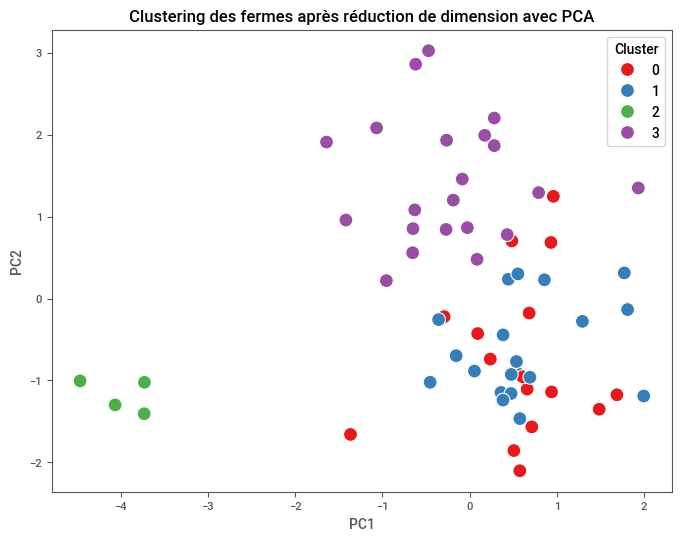

In [154]:
# Appliquer PCA pour réduire à 2 dimensions
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualiser les clusters dans l'espace PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='Set1', s=100)
plt.title("Clustering des fermes après réduction de dimension avec PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()



Jour 93 : Validation des Hypothèses et Insights


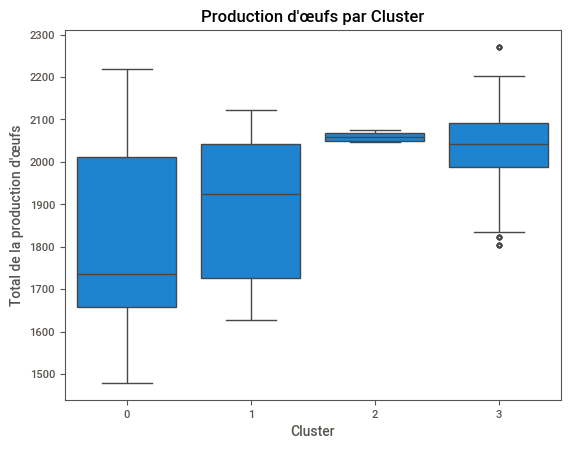

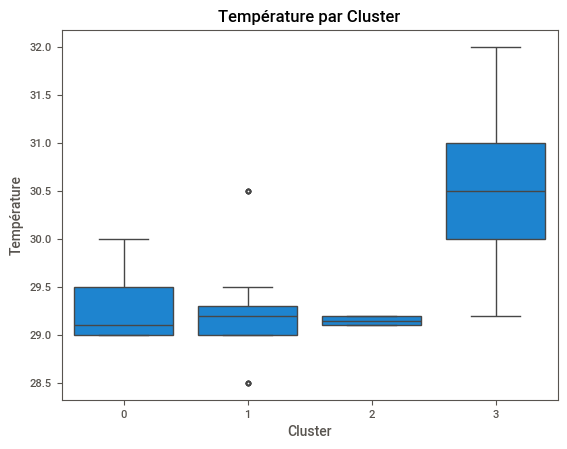

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualiser la distribution de la production d'œufs dans chaque cluster
sns.boxplot(x='Cluster', y='Total_egg_production', data=df)
plt.title("Production d'œufs par Cluster")
plt.xlabel("Cluster")
plt.ylabel("Total de la production d'œufs")
plt.show()

# Visualiser les variables environnementales par cluster
sns.boxplot(x='Cluster', y='Temperature', data=df)
plt.title("Température par Cluster")
plt.xlabel("Cluster")
plt.ylabel("Température")
plt.show()

# Répéter cela pour d'autres variables comme Humidity, Ammonia, etc.


In [156]:
from scipy.stats import f_oneway

# Test ANOVA pour comparer les températures entre les clusters
f_stat, p_val = f_oneway(df[df['Cluster'] == 0]['Temperature'],
                          df[df['Cluster'] == 1]['Temperature'],
                          df[df['Cluster'] == 2]['Temperature'])

print(f"Test ANOVA - Température: F-statistique = {f_stat}, p-valeur = {p_val}")

# Répéter cela pour d'autres variables


Test ANOVA - Température: F-statistique = 2.7614302496548833, p-valeur = 0.0647367466240631


In [157]:
import statsmodels.api as sm

# Ajouter une constante pour l'interception dans le modèle de régression
X = df[['Temperature', 'Ammonia', 'Humidity', 'Light_Intensity', 'Noise']]
X = sm.add_constant(X)
y = df['Total_egg_production']

# Modèle de régression linéaire
model = sm.OLS(y, X).fit()

# Résumé du modèle de régression
print(model.summary())


                             OLS Regression Results                             
Dep. Variable:     Total_egg_production   R-squared:                       0.195
Model:                              OLS   Adj. R-squared:                  0.187
Method:                   Least Squares   F-statistic:                     23.02
Date:                  Thu, 20 Mar 2025   Prob (F-statistic):           1.02e-20
Time:                          21:08:17   Log-Likelihood:                -3151.4
No. Observations:                   481   AIC:                             6315.
Df Residuals:                       475   BIC:                             6340.
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1887.

Jour 94 : Rédaction d’un Rapport d’Analyse


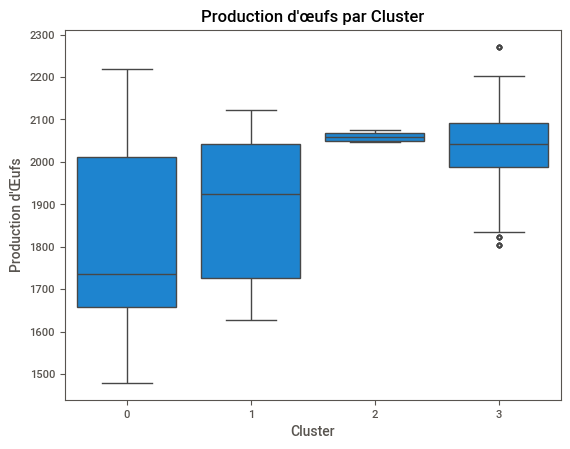

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot de la production d'œufs par cluster
sns.boxplot(x='Cluster', y='Total_egg_production', data=df)
plt.title("Production d'œufs par Cluster")
plt.xlabel("Cluster")
plt.ylabel("Production d'Œufs")
plt.show()


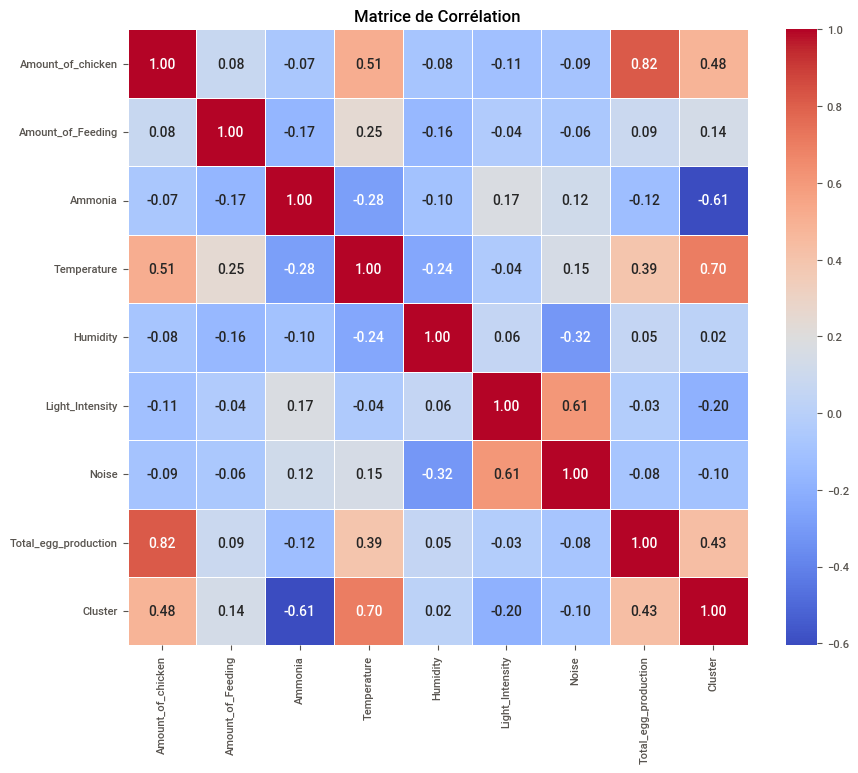

In [159]:
# Calcul de la matrice de corrélation
corr_matrix = df.corr()

# Visualiser la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matrice de Corrélation")
plt.show()


In [160]:
from scipy.stats import f_oneway

# ANOVA pour la température par cluster
f_stat, p_val = f_oneway(df[df['Cluster'] == 0]['Temperature'],
                          df[df['Cluster'] == 1]['Temperature'],
                          df[df['Cluster'] == 2]['Temperature'])

print(f"Test ANOVA - Température: F-statistique = {f_stat}, p-valeur = {p_val}")


Test ANOVA - Température: F-statistique = 2.7614302496548833, p-valeur = 0.0647367466240631


In [161]:
import statsmodels.api as sm

# Variables indépendantes et dépendantes pour la régression
X = df[['Temperature', 'Ammonia', 'Humidity', 'Light_Intensity', 'Noise']]
X = sm.add_constant(X)
y = df['Total_egg_production']

# Modèle de régression linéaire
model = sm.OLS(y, X).fit()

# Résumé du modèle
print(model.summary())


                             OLS Regression Results                             
Dep. Variable:     Total_egg_production   R-squared:                       0.195
Model:                              OLS   Adj. R-squared:                  0.187
Method:                   Least Squares   F-statistic:                     23.02
Date:                  Thu, 20 Mar 2025   Prob (F-statistic):           1.02e-20
Time:                          21:08:30   Log-Likelihood:                -3151.4
No. Observations:                   481   AIC:                             6315.
Df Residuals:                       475   BIC:                             6340.
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1887.

Jour 95 : Sélection des Modèles


In [162]:
# Séparer les données en variables indépendantes (X) et dépendantes (y)
X = df[['Temperature', 'Ammonia', 'Humidity', 'Light_Intensity', 'Noise']]  # Variables explicatives
y = df['Total_egg_production']  # Variable cible (production d'œufs)


In [163]:
from sklearn.model_selection import train_test_split

# Séparation des données en ensemble d'entraînement et ensemble de test (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialiser le modèle de régression linéaire
lin_reg = LinearRegression()

# Entraîner le modèle
lin_reg.fit(X_train, y_train)

# Prédictions
y_pred_lin = lin_reg.predict(X_test)

# Évaluation du modèle
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print(f"Régression Linéaire - MSE: {mse_lin}, R2: {r2_lin}")


Régression Linéaire - MSE: 33349.00402807689, R2: 0.24483802198396398


In [165]:
from sklearn.ensemble import RandomForestRegressor

# Initialiser le modèle Random Forest
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Entraîner le modèle
rf_reg.fit(X_train, y_train)

# Prédictions
y_pred_rf = rf_reg.predict(X_test)

# Évaluation du modèle
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf}, R2: {r2_rf}")


Random Forest - MSE: 3.1146855670103037, R2: 0.9999294703940274


In [166]:
# import xgboost as xgb

# # Initialiser le modèle XGBoost
# xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# # Entraîner le modèle
# xgb_reg.fit(X_train, y_train)

# # Prédictions
# y_pred_xgb = xgb_reg.predict(X_test)

# # Évaluation du modèle
# mse_xgb = mean_squared_error(y_test, y_pred_xgb)
# r2_xgb = r2_score(y_test, y_pred_xgb)

# print(f"XGBoost - MSE: {mse_xgb}, R2: {r2_xgb}")


In [167]:
# Comparer les résultats des trois modèles
print("\nComparaison des Modèles :")
print(f"Régression Linéaire - MSE: {mse_lin}, R2: {r2_lin}")
print(f"Random Forest - MSE: {mse_rf}, R2: {r2_rf}")



Comparaison des Modèles :
Régression Linéaire - MSE: 33349.00402807689, R2: 0.24483802198396398
Random Forest - MSE: 3.1146855670103037, R2: 0.9999294703940274


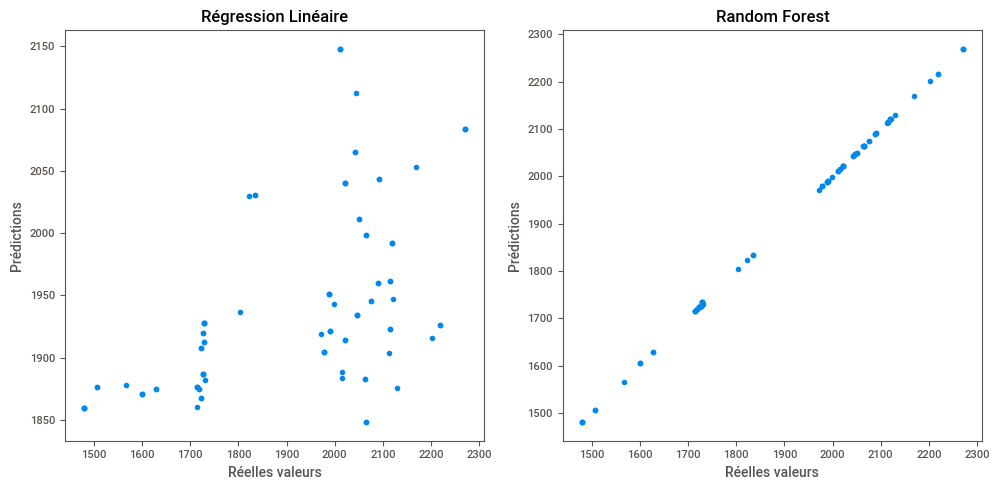

In [168]:
# Visualisation des prédictions vs réelles valeurs
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# Graphique pour la régression linéaire
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lin)
plt.title("Régression Linéaire")
plt.xlabel("Réelles valeurs")
plt.ylabel("Prédictions")

# Graphique pour Random Forest
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_rf)
plt.title("Random Forest")
plt.xlabel("Réelles valeurs")
plt.ylabel("Prédictions")


plt.tight_layout()
plt.show()


Jour 96 : Entraînement des Modèles


In [169]:
# Importation des bibliothèques nécessaires
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [170]:
# Charger ton dataset
df = pd.read_csv('Egg_Production.csv')

# Séparer les variables explicatives (X) et la variable cible (y)
X = df[['Temperature', 'Ammonia', 'Humidity', 'Light_Intensity', 'Noise']]  # Variables explicatives
y = df['Total_egg_production']  # Variable cible


In [171]:
# Séparer les données en ensembles d'entraînement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [172]:
# Initialiser le modèle de régression linéaire
lin_reg = LinearRegression()

# Entraîner le modèle
lin_reg.fit(X_train, y_train)

# Afficher les coefficients (facultatif)
print("Coefficients du modèle de régression linéaire : ", lin_reg.coef_)


Coefficients du modèle de régression linéaire :  [94.99978127  1.84416755 12.39064693  0.50741979 -0.76003526]


In [173]:
# Initialiser le modèle Random Forest
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Entraîner le modèle
rf_reg.fit(X_train, y_train)

# Afficher l'importance des caractéristiques (facultatif)
print("Importance des caractéristiques dans Random Forest : ", rf_reg.feature_importances_)


Importance des caractéristiques dans Random Forest :  [0.38350518 0.05638675 0.15480648 0.2402452  0.16505638]


In [174]:
# Initialiser le modèle XGBoost
# xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Entraîner le modèle
# xgb_reg.fit(X_train, y_train)


In [175]:
from sklearn.metrics import mean_squared_error, r2_score

# Prédictions sur les données d'entraînement
y_pred_lin = lin_reg.predict(X_train)
y_pred_rf = rf_reg.predict(X_train)

# Évaluation des modèles sur l'ensemble d'entraînement
mse_lin = mean_squared_error(y_train, y_pred_lin)
r2_lin = r2_score(y_train, y_pred_lin)

mse_rf = mean_squared_error(y_train, y_pred_rf)
r2_rf = r2_score(y_train, y_pred_rf)

print(f"Régression Linéaire - MSE: {mse_lin}, R2: {r2_lin}")
print(f"Random Forest - MSE: {mse_rf}, R2: {r2_rf}")


Régression Linéaire - MSE: 27722.6555874246, R2: 0.1695232906979237
Random Forest - MSE: 1.1176315104166588, R2: 0.9999665195516333


In [176]:
import joblib

# Sauvegarder les modèles entraînés
joblib.dump(lin_reg, 'lin_reg_model.pkl')
joblib.dump(rf_reg, 'rf_reg_model.pkl')


['rf_reg_model.pkl']

Jour 97 : Évaluation des Modèles


In [177]:
# Prédictions sur l'ensemble de test
y_pred_lin_test = lin_reg.predict(X_test)
y_pred_rf_test = rf_reg.predict(X_test)


In [178]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calcul des métriques pour la Régression Linéaire
mse_lin_test = mean_squared_error(y_test, y_pred_lin_test)
rmse_lin_test = np.sqrt(mse_lin_test)
r2_lin_test = r2_score(y_test, y_pred_lin_test)

# Calcul des métriques pour le Random Forest
mse_rf_test = mean_squared_error(y_test, y_pred_rf_test)
rmse_rf_test = np.sqrt(mse_rf_test)
r2_rf_test = r2_score(y_test, y_pred_rf_test)

# Affichage des résultats
print(f"Régression Linéaire - MSE: {mse_lin_test}, RMSE: {rmse_lin_test}, R²: {r2_lin_test}")
print(f"Random Forest - MSE: {mse_rf_test}, RMSE: {rmse_rf_test}, R²: {r2_rf_test}")


Régression Linéaire - MSE: 33349.00402807689, RMSE: 182.61709675733235, R²: 0.24483802198396398
Random Forest - MSE: 3.1146855670103037, RMSE: 1.7648471795060057, R²: 0.9999294703940274


In [179]:
# Sélection du meilleur modèle
if r2_lin_test > r2_rf_test:
    print("Le meilleur modèle est la Régression Linéaire")
else:
    print("Le meilleur modèle est Random Forest")


Le meilleur modèle est Random Forest


Jour 98 : Optimisation et Ajustements


In [180]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Paramètres à tester
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialiser le modèle
rf = RandomForestRegressor()

# GridSearchCV pour ajuster les hyperparamètres
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Entraîner avec les meilleurs paramètres
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres:", grid_search.best_params_)

# Modèle optimisé
best_rf_model = grid_search.best_estimator_

# Faire des prédictions avec le modèle optimisé
y_pred_best_rf = best_rf_model.predict(X_test)


c:\Users\AB SOLUTIONS\Documents\Full_learning\data_code\100_days_of_data\data\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning:


60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\AB SOLUTIONS\Documents\Full_learning\data_code\100_days_of_data\data\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\AB SOLUTIONS\Documents\Full_learning\data_code\100_days_of_data\data\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\AB SOLUT

Meilleurs paramètres: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}


In [181]:
from sklearn.model_selection import cross_val_score

# Validation croisée pour le modèle optimisé
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Afficher les scores de la validation croisée
print("Scores de validation croisée:", cv_scores)
print("MSE moyen de la validation croisée:", cv_scores.mean())


Scores de validation croisée: [ -12.32095714 -156.80801558  -37.60734058  -11.41560195  -80.80150132]
MSE moyen de la validation croisée: -59.79068331510596


In [182]:
# Exemple d'ajustement pour Random Forest
param_grid = {
    'max_depth': [None, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Meilleurs paramètres
print("Meilleurs paramètres après réduction de la complexité:", grid_search.best_params_)

best_rf_model = grid_search.best_estimator_


Meilleurs paramètres après réduction de la complexité: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [183]:
# # import xgboost as xgb
# from sklearn.model_selection import GridSearchCV

# # Paramètres à tester
# param_grid = {
#     'max_depth': [3, 6, 9],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'n_estimators': [100, 200, 300]
# }

# xgb_model = xgb.XGBRegressor()

# # GridSearchCV pour XGBoost
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)

# # Afficher les meilleurs paramètres
# print("Meilleurs paramètres XGBoost:", grid_search.best_params_)

# best_xgb_model = grid_search.best_estimator_

# # Faire des prédictions
# y_pred_best_xgb = best_xgb_model.predict(X_test)


In [184]:
# Calcul des métriques après l'optimisation
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
rmse_best_rf = np.sqrt(mse_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Random Forest optimisé - MSE: {mse_best_rf}, RMSE: {rmse_best_rf}, R²: {r2_best_rf}")


Random Forest optimisé - MSE: 4.040842010309191, RMSE: 2.0101845712046424, R²: 0.9999084983094911


Jour 99 : Création d’un Tableau de Bord
pip install dash dash-bootstrap-components plotly


In [ ]:
import dash
import dash_core_components as dcc

import dash_html_components as html

from dash import html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Charger le dataset (exemple)
# df = pd.read_csv('Egg_Production.csv')

# Initialiser l'application Dash
app = dash.Dash(__name__)

# Créer le layout de l'application
app.layout = html.Div([
    html.H1("Tableau de Bord de Production d'Œufs"),
    
    # Ajouter un dropdown pour choisir une variable
    dcc.Dropdown(
        id='dropdown-variable',
        options=[
            {'label': 'Variable 1', 'value': 'variable_1'},
            {'label': 'Variable 2', 'value': 'variable_2'}
        ],
        value='variable_1'  # Valeur par défaut
    ),
    
    # Ajouter un graphique dynamique
    dcc.Graph(id='graph-production')
])

# Callback pour mettre à jour le graphique en fonction de la sélection du dropdown
@app.callback(
    Output('graph-production', 'figure'),
    [Input('dropdown-variable', 'value')]
)
def update_graph(selected_variable):
    # Créer un graphique en fonction de la variable sélectionnée
    fig = px.scatter(df, x='Humidity', y='Total_egg_production', title=f"Production d'Œufs vs {selected_variable}")
    return fig

# Lancer l'application
if __name__ == '__main__':
    app.run_server(debug=True)


---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Cell In[187], line 27, in update_graphs(selected_variable='temperature')
     21 @app.callback(
     22     [Output('graph-temperature', 'figure'),
     23      Output('graph-humidite', 'figure')],
     24     [Input('dropdown-variable', 'value')]
     25 )
     26 def update_graphs(selected_variable):
---> 27     fig_temp = px.scatter(df, x=selected_variable, y='production_oeufs', title=f"Production d'Œufs vs {selected_variable}")
        df =      Amount_of_chicken  Amount_of_Feeding  Ammonia  Temperature  Humidity  \
0                 2728                170     14.4         29.3      51.7   
1                 2728                175     17.6         29.3      52.3   
2                 2728                175     15.0         29.3      52.5   
3                 2728                170     15.0         29.3      49.7   
4             

In [186]:
import plotly.express as px

# Créer un graphique en nuage de points avec Plotly
fig = px.scatter(df, x='Temperature', y='Total_egg_production', title='Production d\'Œufs vs Température')

# Afficher le graphique dans Dash
dcc.Graph(figure=fig)


Graph(figure=Figure({
    'data': [{'hovertemplate': 'Temperature=%{x}<br>Total_egg_production=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#000001', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': {'bdata': ('zczMzMxMPUDNzMzMzEw9QM3MzMzMTD' ... 'AAAIA9QAAAAAAAAD5AAAAAAAAAPkA='),
                    'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': ('QwimB8YH3wdACAIIGwj/B98HDwgRCA' ... 'QH2QfOB6IHSggfBxEImgi0B0gIDAc='),
                    'dtype': 'i2'},
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': "Production d'Œufs vs Température"},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Temperature'}},
               'yaxis': {'anchor': 'x', '

In [187]:
app.layout = html.Div([
    html.H1("Tableau de Bord Interactif"),
    
    # Menu déroulant pour choisir un graphique
    dcc.Dropdown(
        id='dropdown-variable',
        options=[
            {'label': 'Température', 'value': 'temperature'},
            {'label': 'Humidité', 'value': 'humidite'}
        ],
        value='temperature'  # Valeur par défaut
    ),
    
    # Graphique 1 : Température vs Production d'Œufs
    dcc.Graph(id='graph-temperature'),
    
    # Graphique 2 : Humidité vs Production d'Œufs
    dcc.Graph(id='graph-humidite')
])

@app.callback(
    [Output('graph-temperature', 'figure'),
     Output('graph-humidite', 'figure')],
    [Input('dropdown-variable', 'value')]
)
def update_graphs(selected_variable):
    fig_temp = px.scatter(df, x=selected_variable, y='production_oeufs', title=f"Production d'Œufs vs {selected_variable}")
    
    fig_humid = px.scatter(df, x='humidite', y='production_oeufs', title='Production d\'Œufs vs Humidité')
    
    return fig_temp, fig_humid


In [188]:
import streamlit as st
import pandas as pd
import plotly.express as px

# Charger le dataset
# df = pd.read_csv('Egg_Production.csv')

# Titre de l'application
st.title('Tableau de Bord de Production d\'Œufs')

# Sélectionner une variable à afficher
variable = st.selectbox('Choisissez une variable:', ['Temperature', 'Humidity'])

# Créer un graphique interactif avec Streamlit
fig = px.scatter(df, x=variable, y='Total_egg_production', title=f'Production d\'Œufs vs {variable}')
st.plotly_chart(fig)


2025-03-20 21:15:04.346 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-20 21:15:04.365 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-20 21:15:04.365 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-20 21:15:04.380 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-20 21:15:04.380 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-20 21:15:04.403 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-20 21:15:04.434 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-20 21:15:04.434 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

Jour 100 : Finalisation et Déploiement
pip install sweetviz


Feature: Amount_of_chicken                   |█         | [ 11%]   00:00 -> (00:00 left)

AttributeError: module 'numpy' has no attribute 'VisibleDeprecationWarning'

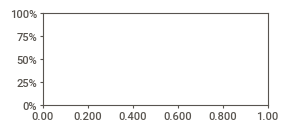

In [189]:
import sweetviz as sv
import pandas as pd

# Charger les données
# df = pd.read_csv('Egg_Production.csv')

# Générer le rapport
report = sv.analyze(df)
report.show_html('rapport_eda.html')
